In [23]:
import pandas as pd
import ast

df = pd.read_csv("depth_ablations.csv")

# Parse the decoder_settings column and flatten it
decoder_settings_df = df['decoder_settings'].apply(ast.literal_eval).apply(pd.Series)

# Add the flattened columns to the original dataframe
df = pd.concat([df, decoder_settings_df], axis=1)

# Drop the original decoder_settings column
df = df.drop('decoder_settings', axis=1)
df

,n_samples,dataset,vsa,hv_dim,depth,device,time_per_sample,accuracy,final_flag,cos_sim_mean,cos_sim_std,beam_size,initial_limit,limit,pruning_method,use_one_initial_population,use_size_aware_pruning
0,100,zinc,HRR,5120,3,cuda,4.650540,0.27,76.0,0.986351,0.020314,32,1024,512,cos_sim,True,True
1,100,zinc,HRR,5120,3,cuda,2.966431,0.29,74.0,0.984076,0.023297,32,1024,512,cos_sim,True,False
2,100,zinc,HRR,5120,4,cuda,4.837558,0.32,71.0,0.988897,0.024909,32,1024,512,cos_sim,True,True
3,100,zinc,HRR,5120,4,cuda,2.869156,0.26,71.0,0.982554,0.038800,32,1024,512,cos_sim,True,False
4,100,zinc,HRR,5120,5,cuda,4.855286,0.34,64.0,0.983292,0.059982,32,1024,512,cos_sim,True,True
5,100,zinc,HRR,5120,5,cuda,2.855385,0.33,68.0,0.958104,0.149833,32,1024,512,cos_sim,True,False
6,100,zinc,HRR,5120,6,cuda,5.013914,0.31,66.0,0.965562,0.133833,32,1024,512,cos_sim,True,True
7,100,zinc,HRR,5120,6,cuda,2.980389,0.34,58.0,0.949553,0.190470,32,1024,512,cos_sim,True,False
8,100,zinc,HRR,5632,3,cuda,5.017879,0.27,82.0,0.986499,0.017525,32,1024,512,cos_sim,True,True
9,100,zinc,HRR,5632,3,cuda,2.993976,0.29,70.0,0.971461,0.100742,32,1024,512,cos_sim,True,False


## Effect of Depth on Accuracy, Final Flags, and Cosine Similarity (Grouped by hv_dim)

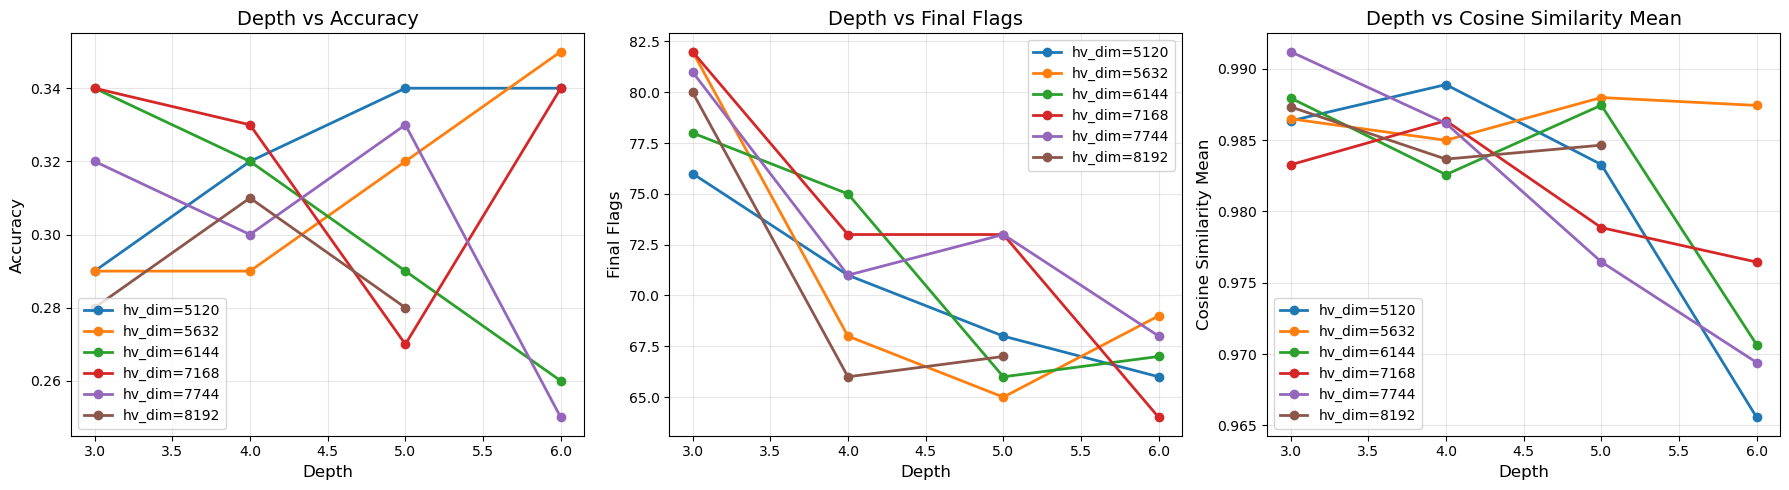

In [28]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

metrics = ['accuracy', 'final_flag', 'cos_sim_mean']
titles = ['Depth vs Accuracy', 'Depth vs Final Flags', 'Depth vs Cosine Similarity Mean']
ylabels = ['Accuracy', 'Final Flags', 'Cosine Similarity Mean']

for hv_dim in df['hv_dim'].unique():
    df_hv = df[df['hv_dim'] == hv_dim]

    for idx, (metric, title, ylabel) in enumerate(zip(metrics, titles, ylabels)):
        ax = axes[idx]

        grouped = df_hv.groupby('depth')[metric].max()
        ax.plot(grouped.index, grouped.values, marker='o', label=f'hv_dim={hv_dim}', linewidth=2)

        ax.set_xlabel('Depth', fontsize=12)
        ax.set_ylabel(ylabel, fontsize=12)
        ax.set_title(title, fontsize=14)
        ax.legend()
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

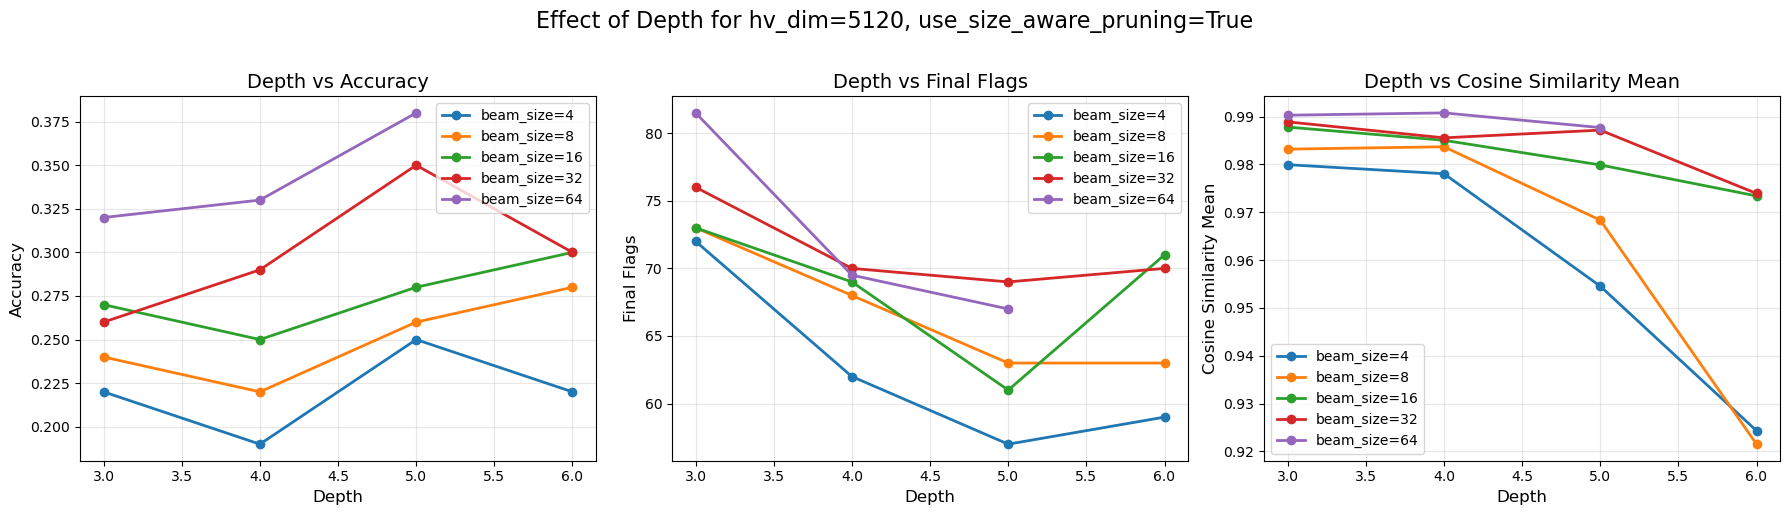

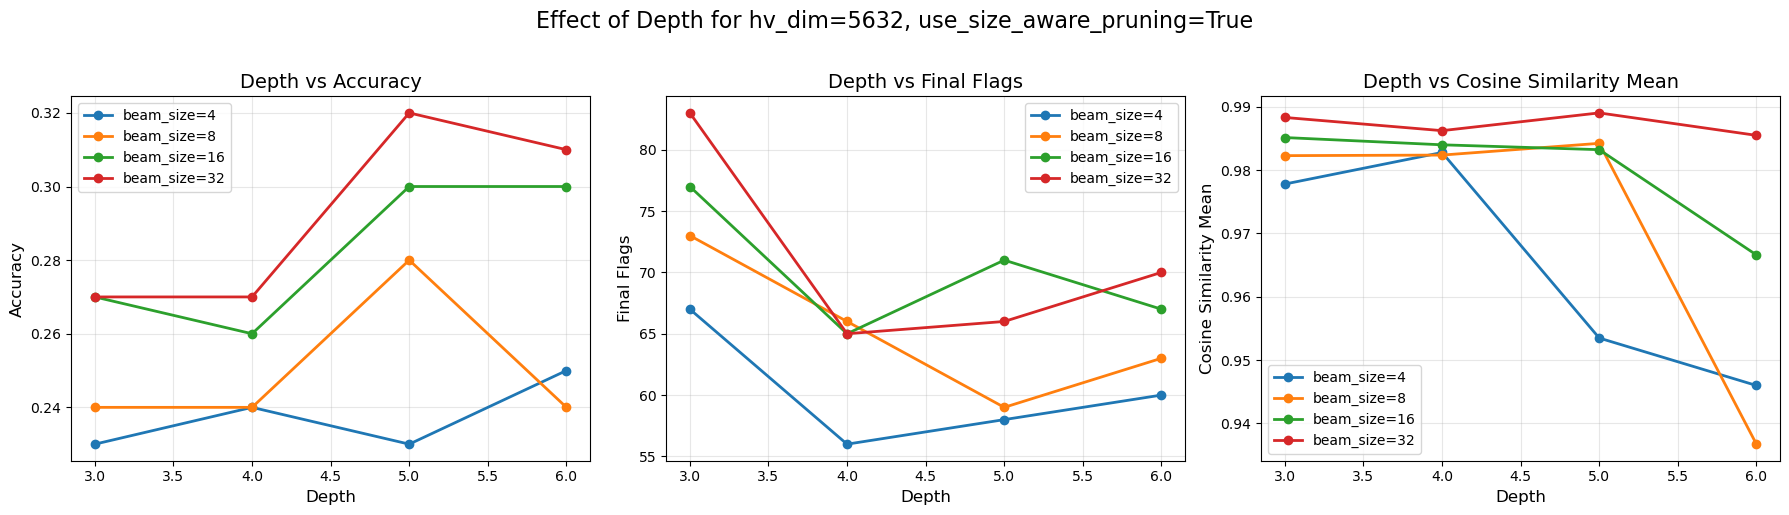

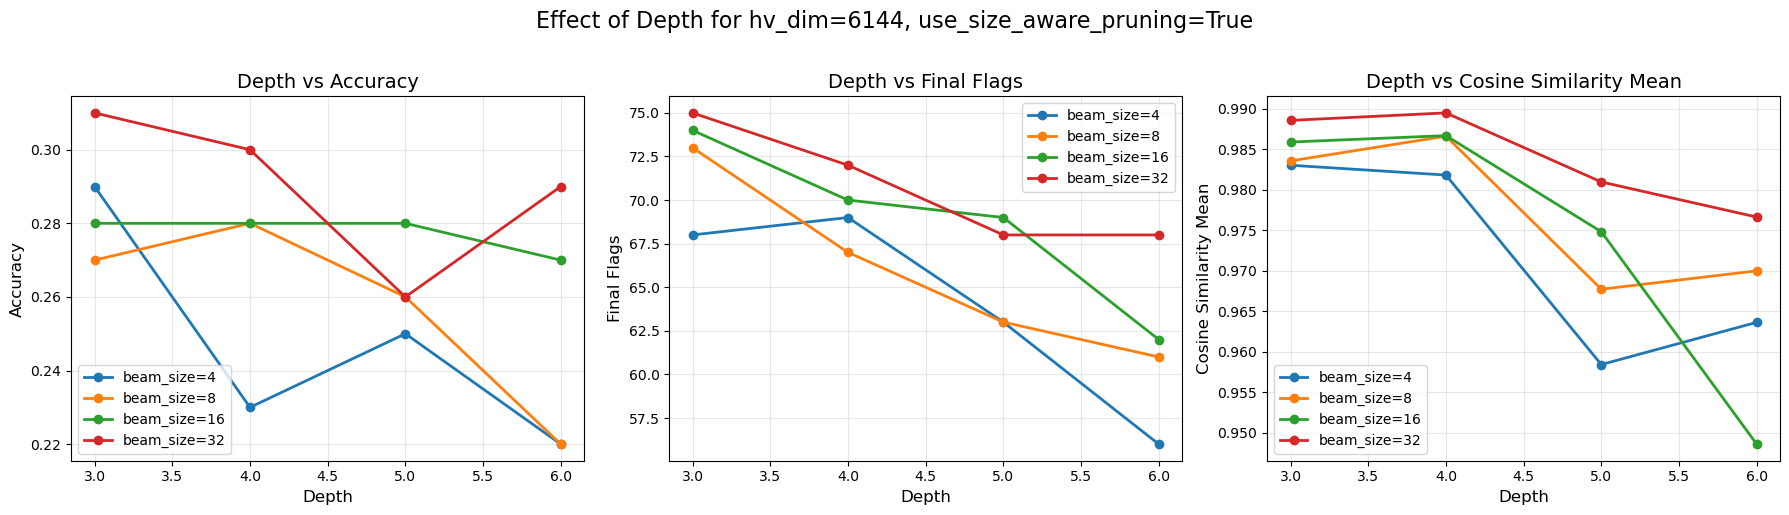

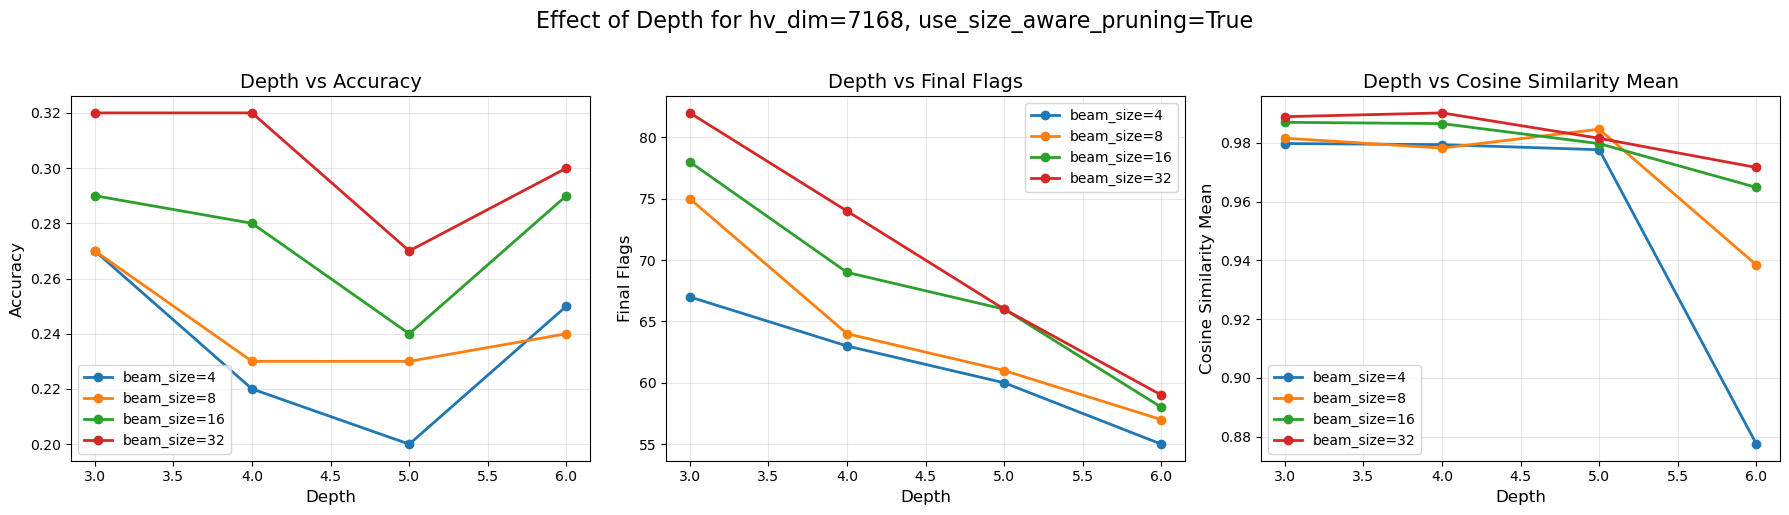

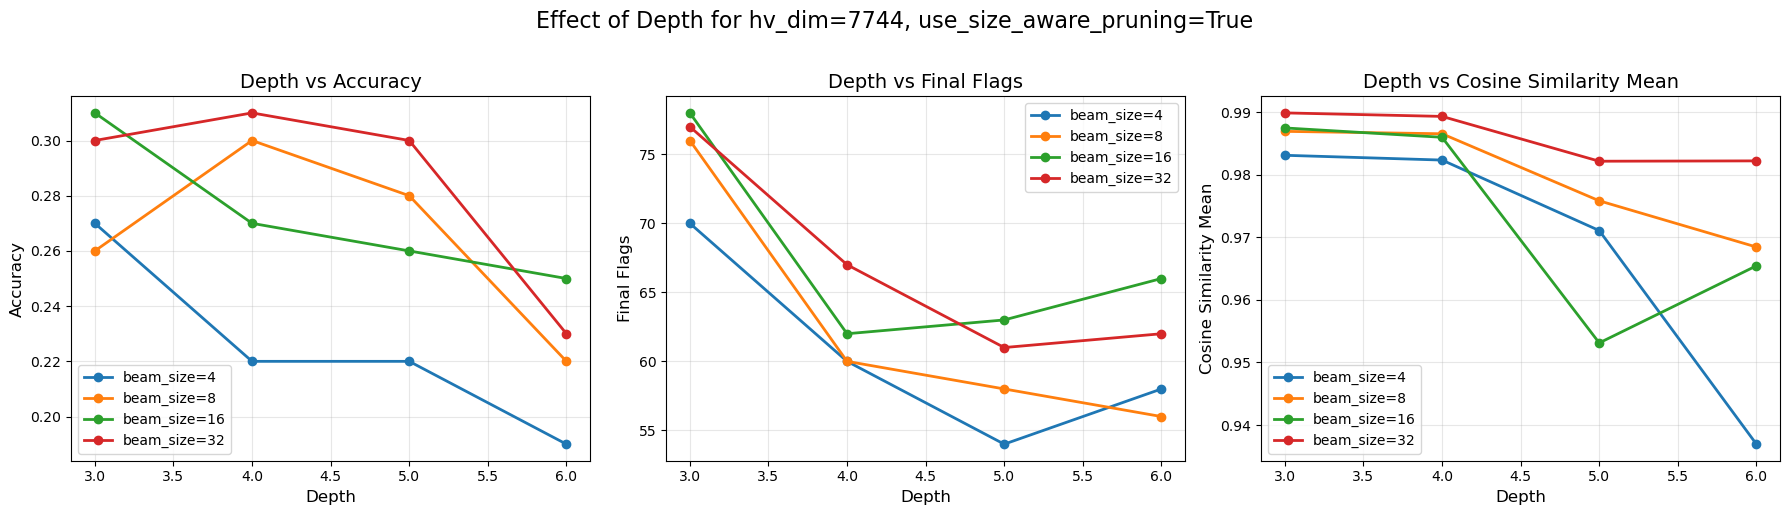

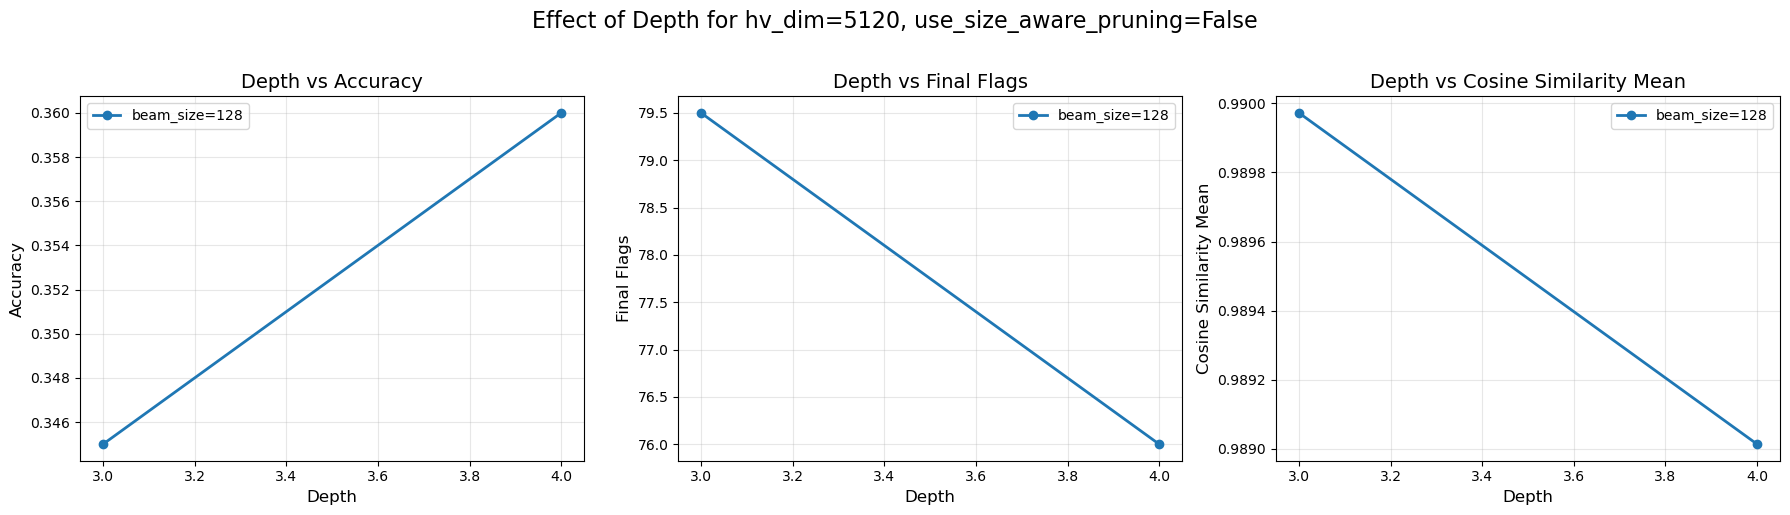

In [7]:
for use_pruning in [True, False]:
    df_pruning = df[df['use_size_aware_pruning'] == use_pruning]

    for hv_dim in df_pruning['hv_dim'].unique():
        df_hv = df_pruning[df_pruning['hv_dim'] == hv_dim]

        fig, axes = plt.subplots(1, 3, figsize=(18, 5))
        fig.suptitle(f'Effect of Depth for hv_dim={hv_dim}, use_size_aware_pruning={use_pruning}', fontsize=16, y=1.02)

        for idx, (metric, title, ylabel) in enumerate(zip(metrics, titles, ylabels)):
            ax = axes[idx]

            for beam_size in sorted(df_hv['beam_size'].unique()):
                df_beam = df_hv[df_hv['beam_size'] == beam_size]
                grouped = df_beam.groupby('depth')[metric].mean()
                ax.plot(grouped.index, grouped.values, marker='o', label=f'beam_size={beam_size}', linewidth=2)

            ax.set_xlabel('Depth', fontsize=12)
            ax.set_ylabel(ylabel, fontsize=12)
            ax.set_title(title, fontsize=14)
            ax.legend()
            ax.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()
